In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.network.twolayernet import BackPropagationNet
from core.network.threelayernet import ThreeLayerNet
from core.layers import *

In [2]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

## Activation Function variations

### Swish

In [3]:
swish_network = BackPropagationNet(784, 50, 10, activation_layer=Swish)

swish_iters_num = 10000
swish_batch_size = 100
swish_lr = 0.1

swish_train_loss_list = []
swish_train_acc_list = []
swish_test_acc_list = []

swish_iter_per_epoch = max(train_size / swish_batch_size, 1)

for i in range(swish_iters_num):
    batch_mask = np.random.choice(train_size, swish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = swish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        swish_network.params[key] -= swish_lr * grad[key]

    loss = swish_network.loss(X_batch, T_batch)
    swish_train_loss_list.append(loss)

    if i % swish_iter_per_epoch == 0:
        swish_train_acc = swish_network.accuracy(X_train, T_train)
        swish_test_acc = swish_network.accuracy(X_test, T_test)
        swish_train_acc_list.append(swish_train_acc)
        swish_test_acc_list.append(swish_test_acc)

        print("train acc, test acc | " + str(swish_train_acc) + ", " + str(swish_test_acc))

train acc, test acc | 0.14446666666666666, 0.1522
train acc, test acc | 0.8802666666666666, 0.8802
train acc, test acc | 0.9132, 0.9108
train acc, test acc | 0.9268833333333333, 0.9264
train acc, test acc | 0.9342666666666667, 0.9318
train acc, test acc | 0.9425166666666667, 0.9383
train acc, test acc | 0.9454333333333333, 0.9415
train acc, test acc | 0.9515333333333333, 0.9486
train acc, test acc | 0.95415, 0.9506
train acc, test acc | 0.9568666666666666, 0.954
train acc, test acc | 0.95955, 0.9543
train acc, test acc | 0.9610166666666666, 0.9548
train acc, test acc | 0.9610833333333333, 0.9548
train acc, test acc | 0.9641, 0.9573
train acc, test acc | 0.9660333333333333, 0.9575


KeyboardInterrupt: 

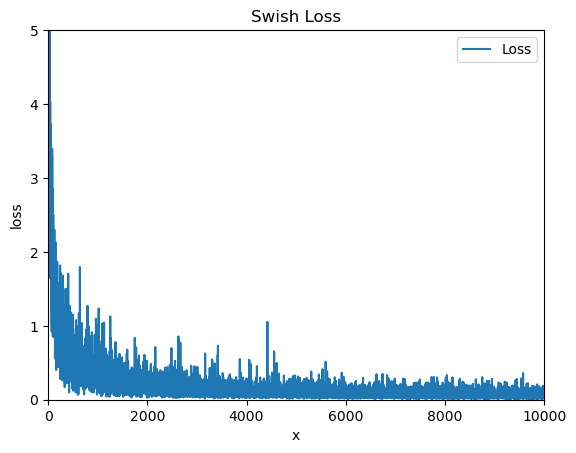

In [ ]:
x = np.arange(len(swish_train_loss_list))
plt.plot(x, swish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Swish Loss")
plt.show()

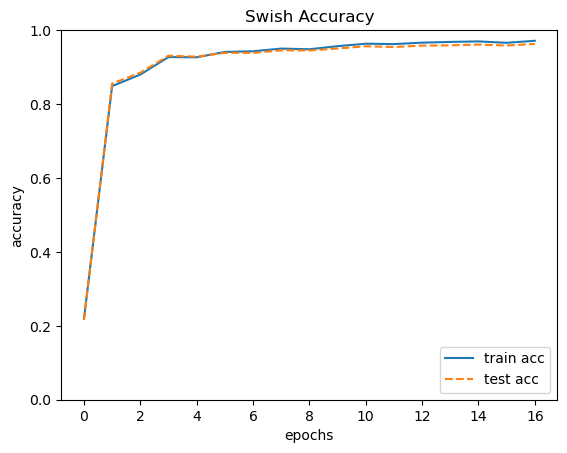

In [ ]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(swish_train_acc_list))

plt.plot(x, swish_train_acc_list, label="train acc")
plt.plot(x, swish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Swish Accuracy")
plt.show()

In [ ]:
print(f"final loss: {swish_train_loss_list[-1]}")
print(f"final train accuracy: {swish_train_acc_list[-1]}")
print(f"final test accuracy: {swish_test_acc_list[-1]}")

final loss: 0.044230355018182295
final train accuracy: 0.9711166666666666
final test accuracy: 0.9626


### Mish

In [ ]:
mish_network = BackPropagationNet(784, 50, 10, activation_layer=Mish)

mish_iters_num = 10000
mish_batch_size = 100
mish_lr = 0.1

mish_train_loss_list = []
mish_train_acc_list = []
mish_test_acc_list = []

mish_iter_per_epoch = max(train_size / mish_batch_size, 1)

for i in range(mish_iters_num):
    batch_mask = np.random.choice(train_size, mish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = mish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        mish_network.params[key] -= mish_lr * grad[key]

    loss = mish_network.loss(X_batch, T_batch)
    mish_train_loss_list.append(loss)

    if i % mish_iter_per_epoch == 0:
        mish_train_acc = mish_network.accuracy(X_train, T_train)
        mish_test_acc = mish_network.accuracy(X_test, T_test)
        mish_train_acc_list.append(mish_train_acc)
        mish_test_acc_list.append(mish_test_acc)

        print("train acc, test acc | " + str(mish_train_acc) + ", " + str(mish_test_acc))

train acc, test acc | 0.1611, 0.1638
train acc, test acc | 0.8636833333333334, 0.8662
train acc, test acc | 0.9140666666666667, 0.9156
train acc, test acc | 0.9282333333333334, 0.9279
train acc, test acc | 0.9388166666666666, 0.9358
train acc, test acc | 0.9427833333333333, 0.9389
train acc, test acc | 0.9483, 0.9439
train acc, test acc | 0.9548166666666666, 0.9517
train acc, test acc | 0.9588, 0.9536
train acc, test acc | 0.9579166666666666, 0.9542
train acc, test acc | 0.9630166666666666, 0.9574
train acc, test acc | 0.9655833333333333, 0.9581
train acc, test acc | 0.9669666666666666, 0.9593
train acc, test acc | 0.9689833333333333, 0.9614
train acc, test acc | 0.9678333333333333, 0.9598
train acc, test acc | 0.9678666666666667, 0.9607
train acc, test acc | 0.97215, 0.9629


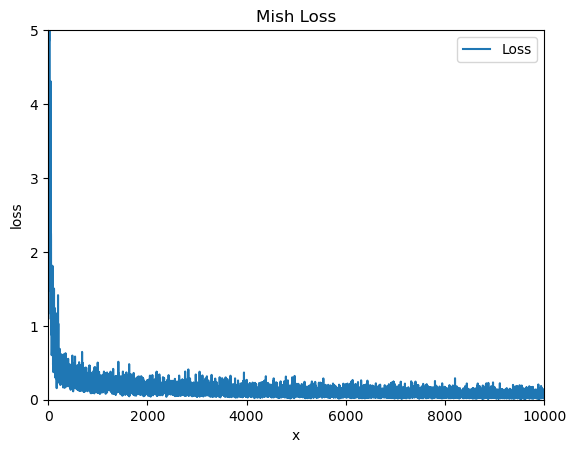

In [ ]:
x = np.arange(len(mish_train_loss_list))
plt.plot(x, mish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Mish Loss")
plt.show()

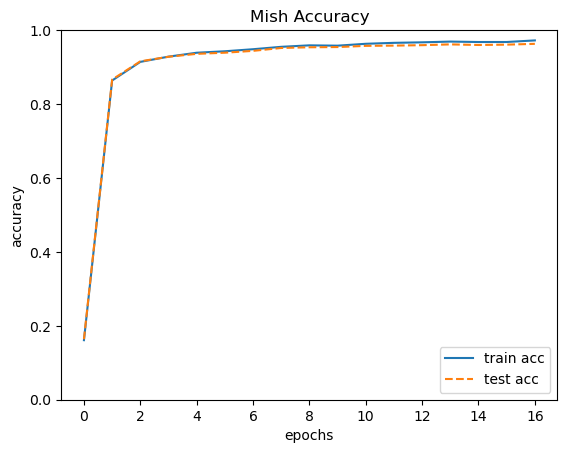

In [ ]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(mish_train_acc_list))

plt.plot(x, mish_train_acc_list, label="train acc")
plt.plot(x, mish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Mish Accuracy")
plt.show()

In [ ]:
print(f"final loss: {mish_train_loss_list[-1]}")
print(f"final train accuracy: {mish_train_acc_list[-1]}")
print(f"final test accuracy: {mish_test_acc_list[-1]}")

final loss: 0.027456209572538803
final train accuracy: 0.97215
final test accuracy: 0.9629


## Network Structure Variation

### Three Layer Network with ReLU activation function

In [ ]:
tln_network = ThreeLayerNet(784, 60, 60, 10, activation_layer=ReLU)

tln_iters_num = 10000
tln_batch_size = 100
tln_lr = 0.1

tln_train_loss_list = []
tln_train_acc_list = []
tln_test_acc_list = []

tln_iter_per_epoch = max(train_size / tln_batch_size, 1)

for i in range(tln_iters_num):
    batch_mask = np.random.choice(train_size, tln_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = tln_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2", "W3", "B3"):
        tln_network.params[key] -= tln_lr * grad[key]

    loss = tln_network.loss(X_batch, T_batch)
    tln_train_loss_list.append(loss)

    if i % tln_iter_per_epoch == 0:
        tln_train_acc = tln_network.accuracy(X_train, T_train)
        tln_test_acc = tln_network.accuracy(X_test, T_test)
        tln_train_acc_list.append(tln_train_acc)
        tln_test_acc_list.append(tln_test_acc)

        print("train acc, test acc | " + str(tln_train_acc) + ", " + str(tln_test_acc))

train acc, test acc | 0.11368333333333333, 0.1158
train acc, test acc | 0.8753333333333333, 0.8781
train acc, test acc | 0.9144333333333333, 0.9149
train acc, test acc | 0.92835, 0.9248
train acc, test acc | 0.9246166666666666, 0.9229
train acc, test acc | 0.93425, 0.9313
train acc, test acc | 0.9466166666666667, 0.9423
train acc, test acc | 0.9492, 0.9461
train acc, test acc | 0.9508833333333333, 0.9406
train acc, test acc | 0.95655, 0.9514
train acc, test acc | 0.9536333333333333, 0.9464
train acc, test acc | 0.9593166666666667, 0.9524
train acc, test acc | 0.9613166666666667, 0.9529
train acc, test acc | 0.9660333333333333, 0.957
train acc, test acc | 0.9678, 0.9571
train acc, test acc | 0.9663333333333334, 0.9573
train acc, test acc | 0.9699666666666666, 0.9593


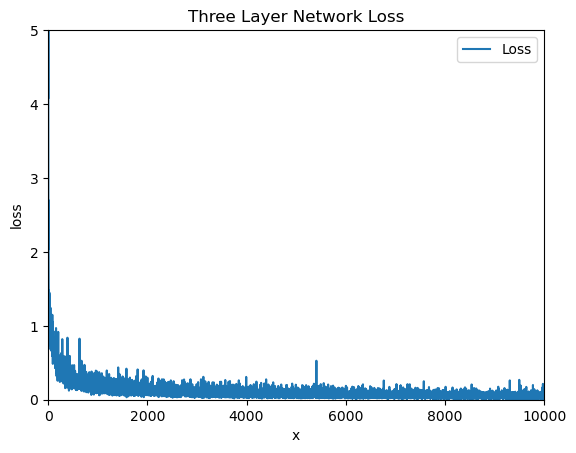

In [ ]:
x = np.arange(len(tln_train_loss_list))
plt.plot(x, tln_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Three Layer Network Loss")
plt.show()

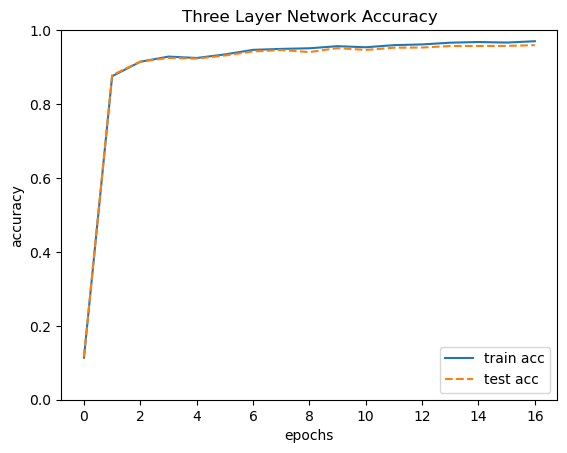

In [ ]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(tln_train_acc_list))

plt.plot(x, tln_train_acc_list, label="train acc")
plt.plot(x, tln_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Three Layer Network Accuracy")
plt.show()

In [ ]:
print(f"final loss: {tln_train_loss_list[-1]}")
print(f"final train accuracy: {tln_train_acc_list[-1]}")
print(f"final test accuracy: {tln_test_acc_list[-1]}")

final loss: 0.020424993994639526
final train accuracy: 0.9699666666666666
final test accuracy: 0.9593
